# Doing math and statistics with python

In this assignment, we practice and extend our use of mathematics and statistics in python. As in datacamp, we will focus on hacker statistics.

# Import libraries

First, we need to import some libraries:

In [8]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Math

## real valued function

We start simple with the function $x^2 - 8x +15$.

**a) [1 point]:** Define the python function `objective` as $x^2 - 8x +15$.

In [9]:
def objective(x):
    return x**2 - 8*x + 15

We want to know what the zeros/roots are of this function; that is, the points $x$ where the function equals 0 (or, crosses the $x$-axis).

**b) [1 point]:** Use `fsolve` from `scipy.optimize` to find **both** roots of this functions.

In [10]:
root1 = optimize.fsolve(objective,3) 
root2 = optimize.fsolve(objective,8) 
print(root1)
print(root2)

[3.]
[5.]


**c) [1 point]:** Use `matplotlib` to plot both the function `objective` and the function $1.5 x$. Make sure that the horizontal axis is labeled $x$ and the vertical axis $y$.

<function matplotlib.pyplot.show>

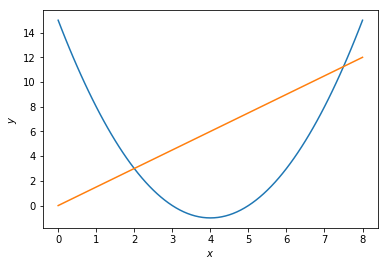

In [18]:
range_x = np.arange(0,8.1,0.1)
range_y = [objective(x) for x in range_x]
range_y2 = [1.5*x for x in range_x]
plt.plot(range_x, range_y)
plt.plot(range_x, range_y2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show

**d) [1 point]:** Find the points of intersection between the function `objective` above and the function $f(x)=1.5 x$.

In [19]:
root3= optimize.fsolve(lambda x:objective(x)-1.5*x,0) 
root4 = optimize.fsolve(lambda x:objective(x)-1.5*x,10) 
print(root3)
print(root4)

[2.]
[7.5]


**e) [1 point]** Find the minimum of the function `objective`.

In [20]:
optimize.fmin(objective,0)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 29
         Function evaluations: 58


array([4.])

## vector valued function

Now we consider a system of three linear equations in three unknowns:

\begin{align}
x_0 + 3x_1+6x_2 &= 10 \\
2x_0 + 9x_1+2x_2 &= 15 \\
8x_0 + 3x_1+9x_2 &= 11
\end{align}

where we have adjusted the indices on $x$ to facilitate the "translation" to python. The function $f$ below captures this system.

In [21]:
def f(x):
    return [x[0]+3*x[1]+6*x[2]-10,2*x[0]+9*x[1]+2*x[2]-15,8*x[0]+3*x[1]+9*x[2]-11]

Although we often use `fsolve` to solve one (non-linear) equation in one unknown; it can also solve systems of equations.

**f) [1 point]** Use `fsolve` to solve $f(x)=0$.

In [22]:
optimize.fsolve(f,[0,0,0])

array([-0.26605505,  1.51376147,  0.95412844])

Because we have a linear system here, we can also use matrices to solve this problem. So we write the equations above as 

\begin{equation}
Ax = b
\end{equation}

where $A$ and $b$ are defined as follows:

In [23]:
A = np.matrix([[1,3,6],[2,9,2],[8,3,9]])
b = np.matrix([[10],[15],[11]])

**g) [1 point]** Why didn't we write `b = np.matrix([10,15,11])`?

YOUR ANSWER HERE

**h) [1 point]** Use $A^{-1}$ to solve this system of linear equations.

In [24]:
A.I*b

matrix([[-0.26605505],
        [ 1.51376147],
        [ 0.95412844]])

# Hacker statistics

To illustrate how to use statistical distributions in python, we will revisit two well known statisticals results. Instead of deriving these, we will simulate them. Then we ask you to recognize what they are.

We start with a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

To draw one sample out of a Poisson distribution with parameter $\lambda = 4$, you can do the following:

In [25]:
np.random.poisson(4,1)

array([6])

Note that these numbers are random. Hence, you see a different number, each time you do this.

We can also draw 5 samples from this distribution:

In [26]:
np.random.poisson(4,5)

array([4, 6, 4, 3, 5])

To get an idea of what the distribution looks like, we can plot the mathematical equation for this distribution. 

But another way to do this, is to draw, say, 2000 samples from it and then plot the histogram of these samples. As long as you draw enough samples, this histogram will be reasonable accurate.

**i) [1 point]** Plot the histogram of 2000 draws from this Poisson distribution with $\lambda=4$.

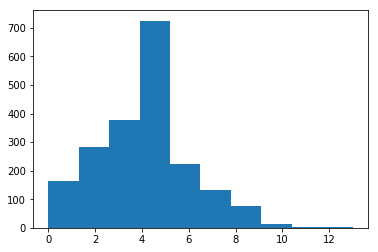

In [30]:
plt.hist(np.random.poisson(4,2000))
plt.show()

Now we are going to use this same idea to generate the distribution of the mean. The function `mean(n)` below does the following. We draw `n` samples out of the Poisson distribution with $\lambda =4$ and we calculate the average (mean) of these `n` draws. This experiment --of calculating the mean of `n` draws-- we do 2000 times.

In [36]:
number_of_iterations = 2000

def mean(n):
    averages = []
    for i in range(number_of_iterations):
        x = np.random.poisson(4,n)
        averages.append(np.mean(x))
    return averages

**j) [1 point]** Plot the distribution of the average of 100 draws from a Poisson distribution with $\lambda=4$.

(array([  6.,  23., 118., 305., 417., 516., 356., 184.,  64.,  11.]),
 array([3.33 , 3.458, 3.586, 3.714, 3.842, 3.97 , 4.098, 4.226, 4.354,
        4.482, 4.61 ]),
 <a list of 10 Patch objects>)

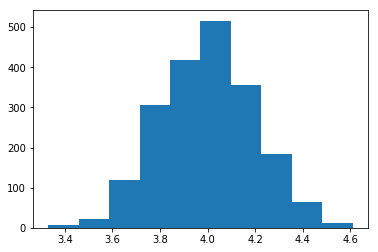

In [37]:
plt.hist(mean(100))

**k) [1 point]** What shape does this distribution have and why?

bell shaped/normal distribution. because of the central limit theorem 

**l) [1 point]** Calculate the average of this distribution. Does this coincide with the theoretical prediction of this average?

In [38]:
np.mean(mean(100))

3.9939400000000007

YOUR ANSWER HERE

**m [1 point]** Calculate the standard deviation of this average. What is this standard deviation called? What is the theoretical expression for this standard deviation?

In [39]:
np.std(mean(100))

0.19678193413014317

standard error 